In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.width', 55)
import seaborn as sns
import matplotlib.pyplot as plt

# df of mape
df_raw = pd.read_csv(r"C:\Users\Gillian  Zaragosa\Documents\PythonProjects\ml-for-forecasting\evaluations\mape.csv")
df = df_raw.copy(deep = True)
df = df.drop(columns='fname', axis=1)
df

,ridge,rf,lr,gb,xbg,dt,lasso,enr,knn
0,3.810878e-02,2.090036e-01,3.810164e-02,2.060814e-01,2.063632e-01,1.857215e-01,3.765516e-02,3.754009e-02,2.336334e-01
1,2.917446e-02,2.826581e-02,2.917276e-02,2.322904e-02,2.511422e-02,2.719921e-02,2.350105e-02,2.633592e-02,3.363479e-02
2,3.879706e-02,5.071468e-02,3.877443e-02,7.967608e-02,6.026875e-02,4.082653e-02,4.223306e-02,4.201115e-02,6.782662e-02
3,2.747852e-02,8.261091e-02,2.749039e-02,1.073820e-01,9.740768e-02,8.291779e-02,2.830688e-02,2.819043e-02,8.675855e-02
4,1.868657e-02,2.707158e-02,1.869466e-02,3.625844e-02,2.880133e-02,2.865805e-02,1.751860e-02,1.751860e-02,3.294649e-02
5,1.785535e-02,2.334814e-02,1.788715e-02,2.506923e-02,2.413229e-02,2.244937e-02,1.776590e-02,1.774935e-02,2.234213e-02
6,3.781635e-02,6.469265e-02,3.794921e-02,4.803084e-02,4.088343e-02,4.291195e-02,3.708667e-02,3.773586e-02,5.061781e-02
7,2.457727e-02,2.918412e-02,3.198745e-02,3.402726e-02,3.735360e-02,2.841163e-02,2.939387e-02,2.847804e-02,3.484836e-02
8,2.104639e-02,2.603492e-02,2.123843e-02,2.720055e-02,2.456475e-02,2.549111e-02,2.140646e-02,2.183707e-02,3.798799e-02
9,9.509973e+15,9.752049e+15,1.006160e+16,6.705721e+15,3.734791e+15,4.511499e+15,7.056089e+15,7.056089e+15,4.745188e+15


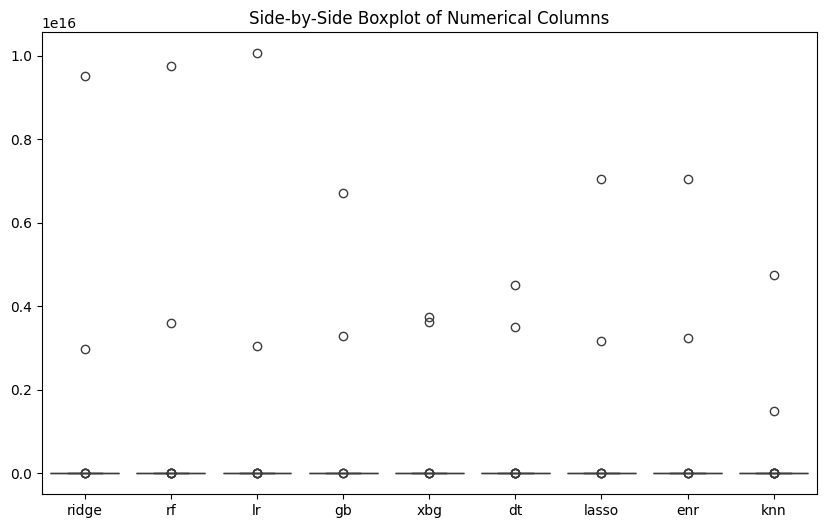

In [2]:
# Assuming df is your dataframe
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)

# Show the plot
plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

Here, instead of removing rows where atleast one of its values is beyond the IQR, we're just removing the row where at least one element is > 1

In [7]:
df_filtered = df[df.le(1).all(axis=1)]
df_filtered

,ridge,rf,lr,gb,xbg,dt,lasso,enr,knn
0,0.038109,0.209004,0.038102,0.206081,0.206363,0.185722,0.037655,0.037540,0.233633
1,0.029174,0.028266,0.029173,0.023229,0.025114,0.027199,0.023501,0.026336,0.033635
2,0.038797,0.050715,0.038774,0.079676,0.060269,0.040827,0.042233,0.042011,0.067827
3,0.027479,0.082611,0.027490,0.107382,0.097408,0.082918,0.028307,0.028190,0.086759
4,0.018687,0.027072,0.018695,0.036258,0.028801,0.028658,0.017519,0.017519,0.032946
5,0.017855,0.023348,0.017887,0.025069,0.024132,0.022449,0.017766,0.017749,0.022342
6,0.037816,0.064693,0.037949,0.048031,0.040883,0.042912,0.037087,0.037736,0.050618
7,0.024577,0.029184,0.031987,0.034027,0.037354,0.028412,0.029394,0.028478,0.034848
8,0.021046,0.026035,0.021238,0.027201,0.024565,0.025491,0.021406,0.021837,0.037988
10,0.085922,0.036096,0.123720,0.040188,0.033475,0.038697,0.036339,0.037846,0.045235


In [8]:
len(df_filtered)

48

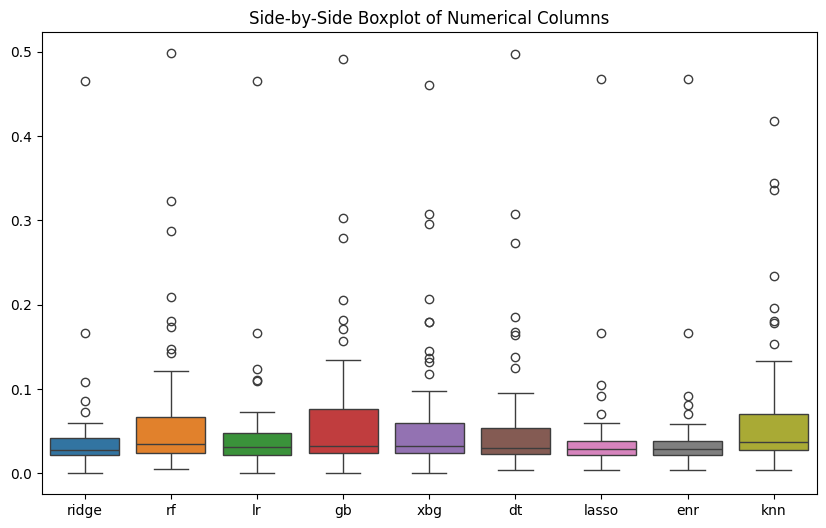

In [6]:
# Assuming df is your dataframe
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered)

# Show the plot
plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()